In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
file = files.upload()

Saving audit_data.csv to audit_data.csv


In [3]:
#reading the csv file and creating a copy of it
original_data = pd.read_csv("/content/audit_data.csv")
data = original_data.copy()
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
data.shape

(776, 27)

In [5]:
#summary of each column of the dataset
data.describe(include = 'all')

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
unique,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20.184536,NaN,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,NaN,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,NaN,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,NaN,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,NaN,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,NaN,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000


In [6]:
#checking whether data contains null values
data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [0]:
#replacing all the null values by the mean value of the column
mean_money_value = data.Money_Value.mean()
data.Money_Value.fillna(mean_money_value, inplace = True)

In [8]:
data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [9]:
#finding the data type of each column of the dataset
data.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [10]:
#the names of the columns in the data
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [0]:
#dropping unwanted columns from the dataset
data = data.drop(['Detection_Risk', 'LOCATION_ID', 'TOTAL'], 1) 

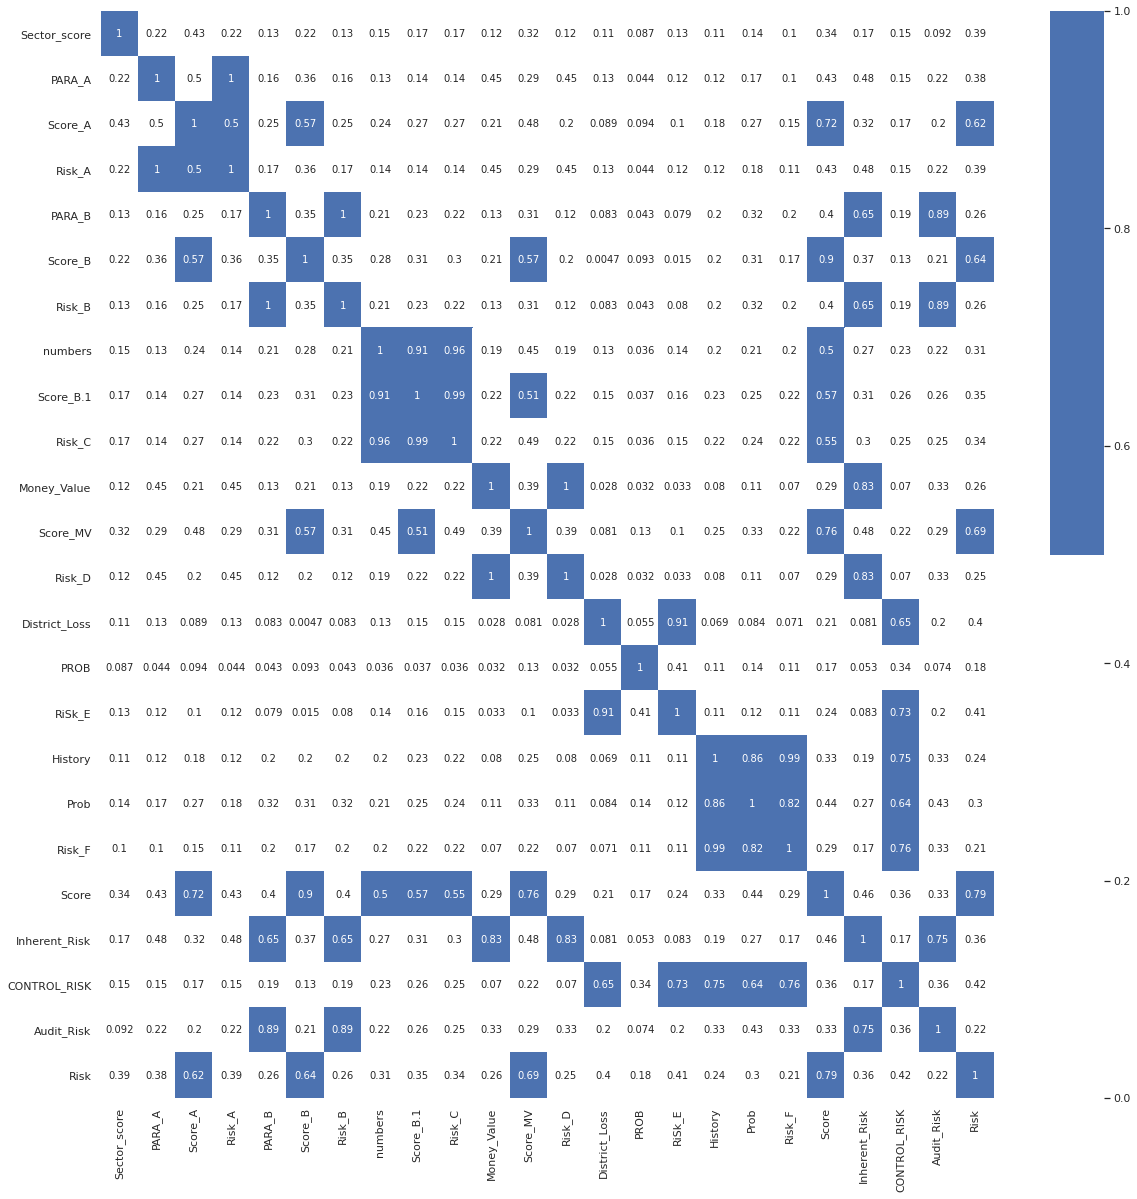

In [14]:
#creating a heatmap to find the correlation between the variables in the data 
plt.figure(figsize = (20,20))
colors = ['w', 'b']
sns.heatmap(abs(data.corr()), vmin = 0, vmax = 1.0, cmap = colors, annot = True)

In [0]:
#dropping unwanted columns 
new_data = data.drop(['Score', 'Inherent_Risk', 'CONTROL_RISK', 'Risk_A', 'Risk_B','Risk_C', 'Score_B.1', 'Audit_Risk', 'Risk_D', 'RiSk_E', 'Risk_F', 'History', 'PROB'], 1)

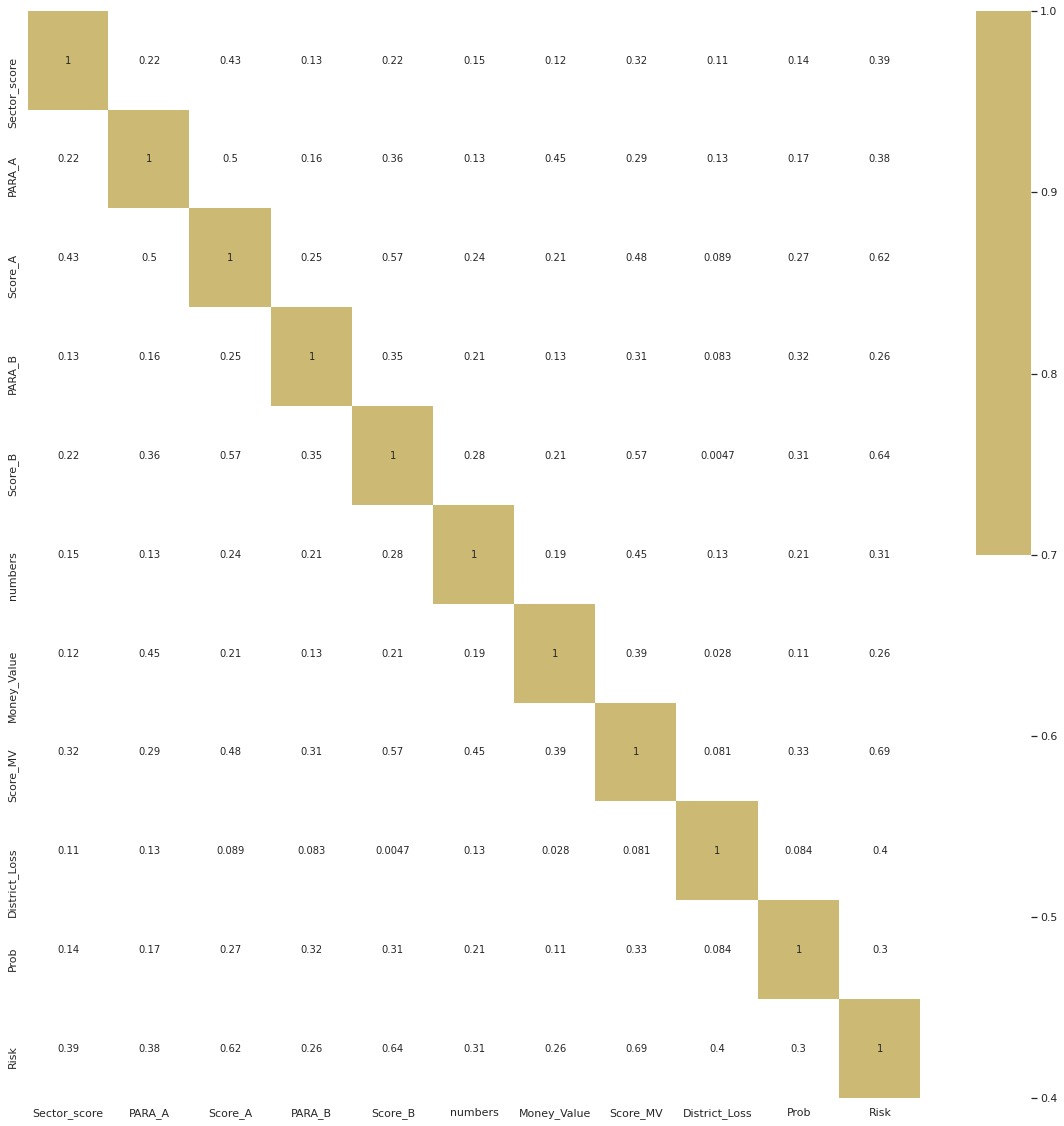

In [17]:
#plotting a heatmap of the columns chosen
plt.figure(figsize = (20,20))
colors = ['w', 'y']
sns.heatmap(abs(new_data.corr()), vmin = 0.4, vmax = 1.0, cmap = colors, annot = True)

In [0]:
cat_cols = ['Sector_score', 'Money_Value']

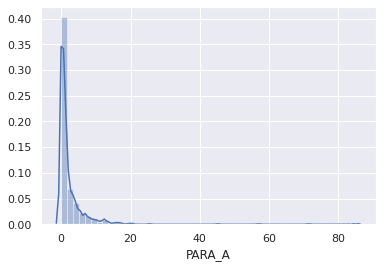

In [19]:
sns.distplot(new_data.PARA_A)

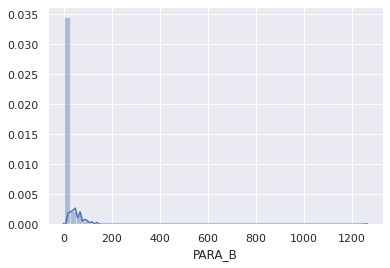

In [20]:
sns.distplot(new_data.PARA_B)

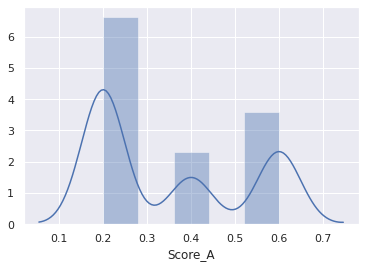

In [21]:
sns.distplot(new_data.Score_A)

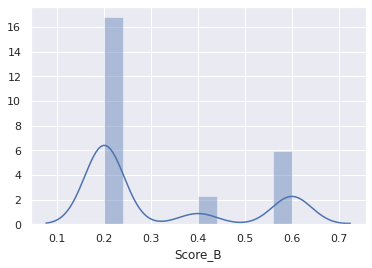

In [22]:
sns.distplot(new_data.Score_B)

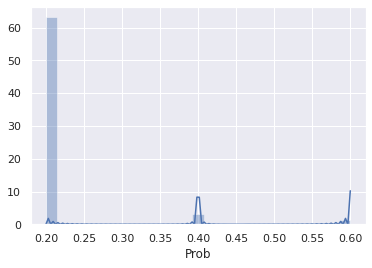

In [23]:
sns.distplot(new_data.Prob)

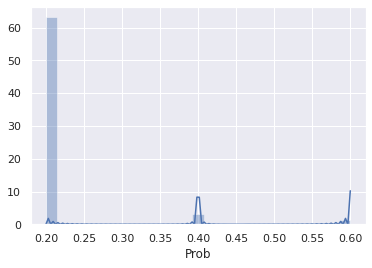

In [24]:
sns.distplot(new_data.Prob)

In [25]:
new_data.dtypes

Sector_score     float64
PARA_A           float64
Score_A          float64
PARA_B           float64
Score_B          float64
numbers          float64
Money_Value      float64
Score_MV         float64
District_Loss      int64
Prob             float64
Risk               int64
dtype: object

In [0]:
#converting the datatype of categorical columns to category
for col in cat_cols:
    new_data[col] = new_data[col].astype('category')

In [27]:
new_data.dtypes

Sector_score     category
PARA_A            float64
Score_A           float64
PARA_B            float64
Score_B           float64
numbers           float64
Money_Value      category
Score_MV          float64
District_Loss       int64
Prob              float64
Risk                int64
dtype: object

In [28]:
#printing the new data created after dropping columns
new_data

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,numbers,Money_Value,Score_MV,District_Loss,Prob,Risk
0,3.89,4.18,0.6,2.50,0.2,5.0,3.38,0.2,2,0.2,1
1,3.89,0.00,0.2,4.83,0.2,5.0,0.94,0.2,2,0.2,0
2,3.89,0.51,0.2,0.23,0.2,5.0,0.00,0.2,2,0.2,0
3,3.89,0.00,0.2,10.80,0.6,6.0,11.75,0.6,2,0.2,1
4,3.89,0.00,0.2,0.08,0.2,5.0,0.00,0.2,2,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.40,0.2,5.0,0.00,0.2,2,0.2,0
772,55.57,0.47,0.2,0.37,0.2,5.0,0.00,0.2,2,0.2,0
773,55.57,0.24,0.2,0.04,0.2,5.0,0.00,0.2,2,0.2,0
774,55.57,0.20,0.2,0.00,0.2,5.0,0.00,0.2,2,0.2,0


In [0]:
#scaling the data for better prediction
scaler = StandardScaler()

In [0]:
#defining the dependent and independent variables
#dependent variable is Risk
X = new_data.drop(['Risk'], 1)
y = new_data.Risk

In [31]:
#Risk contains 2 categories
y.value_counts()

0    471
1    305
Name: Risk, dtype: int64

In [0]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [0]:
#scaling the X_train and X_test data and putting it in a new data frame
cols = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = cols)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = cols)

In [0]:
LogReg = LogisticRegression()

In [35]:
#performing logistics regression on the data
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#checking accuracy of the model
LogReg.score(X_train, y_train)

0.990791896869245

In [37]:
LogReg.score(X_test, y_test)

0.9957081545064378

In [38]:
#printing a classification report for logistics regression
print(classification_report(y_test, LogReg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       141
           1       0.99      1.00      0.99        92

    accuracy                           1.00       233
   macro avg       0.99      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [0]:
#Support Vector Classifier
svc = SVC()

In [40]:
# using Grid search cv with SVC and fitting it on the data
grid_params_SVC = {'C': [0.1, 1, 5], 'gamma': [0.001, 0.01, 0.1, 1]}
Grid_SVC = GridSearchCV(svc, grid_params_SVC, scoring = 'accuracy', cv = 5)
Grid_SVC.fit(X_train, y_train)
print(classification_report(y_test, Grid_SVC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.99      0.98      0.98        92

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



In [41]:
#the best parameters of SVC
Grid_SVC.best_params_

{'C': 5, 'gamma': 0.1}

In [42]:
#decision tree algorithm with grid search cv
dtree = DecisionTreeClassifier()
grid_params_dtree = {'criterion': ['gini', 'entropy'], 'min_samples_split' : [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
Grid_dtree = GridSearchCV(dtree, grid_params_dtree, scoring = 'accuracy', cv = 5)
Grid_dtree.fit(X_train, y_train)
print(classification_report(y_test, Grid_dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       141
           1       0.93      0.99      0.96        92

    accuracy                           0.97       233
   macro avg       0.96      0.97      0.96       233
weighted avg       0.97      0.97      0.97       233



In [43]:
#best parameters for the model
Grid_dtree.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [44]:
#random forest
rfc = RandomForestClassifier()
grid_params_rfc = {'max_depth': [5, 10,50] ,'criterion': ['gini', 'entropy'], 'min_samples_split' : [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
Grid_rfc = GridSearchCV(rfc, grid_params_rfc, scoring = 'accuracy', cv = 5)
Grid_rfc.fit(X_train, y_train)
print(classification_report(y_test, Grid_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.99      0.99      0.99        92

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



In [45]:
#best parameters for random forest
Grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [46]:
#printing confusion matrix for all the 4 algorithms used
print(confusion_matrix(y_test, LogReg.predict(X_test)))
print('\n\n')
print(confusion_matrix(y_test, Grid_SVC.predict(X_test)))
print('\n\n')
print(confusion_matrix(y_test, Grid_dtree.predict(X_test)))
print('\n\n')
print(confusion_matrix(y_test, Grid_rfc.predict(X_test)))

[[140   1]
 [  0  92]]



[[140   1]
 [  2  90]]



[[134   7]
 [  1  91]]



[[140   1]
 [  1  91]]
